<a href="https://colab.research.google.com/github/manojrathor/mnist/blob/master/mnist_MLP_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive


In [0]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# load dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


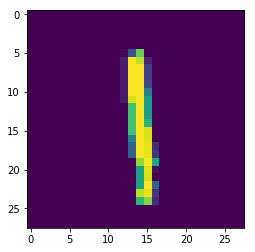

In [4]:
plt.imshow(x_train[8])
plt.show()

In [5]:
# computer the shape of the train and test dataser
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [9]:
model = Sequential()
model.add(Dense(64,activation = 'relu',input_shape = (784,)))
model.add(Dense(10,activation = 'softmax'))

W0713 12:30:02.471342 139647535216512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 12:30:02.535032 139647535216512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 12:30:02.543671 139647535216512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [10]:
# Compile a model
model.compile(optimizer = 'sgd',loss = 'categorical_crossentropy',metrics = ['accuracy'])

W0713 12:30:07.785348 139647535216512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 12:30:07.822496 139647535216512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
# fir the model to training data
history = model.fit(x_train,y_train,validation_split = 0.2, epochs =50, batch_size = 64)

W0713 12:30:11.889022 139647535216512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 12:30:11.950438 139647535216512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 7s 155us/step - loss: 1.0150 - acc: 0.7490 - val_loss: 0.5167 - val_acc: 0.8761
Epoch 2/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.4703 - acc: 0.8786 - val_loss: 0.3889 - val_acc: 0.8970
Epoch 3/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.3902 - acc: 0.8932 - val_loss: 0.3432 - val_acc: 0.9052
Epoch 4/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.3526 - acc: 0.9011 - val_loss: 0.3195 - val_acc: 0.9107
Epoch 5/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.3287 - acc: 0.9078 - val_loss: 0.2998 - val_acc: 0.9166
Epoch 6/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.3109 - acc: 0.9131 - val_loss: 0.2866 - val_acc: 0.9193
Epoch 7/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.2964 - acc: 0.9174 - val_loss: 0.2760 - val_ac

In [12]:
model.evaluate(x_test,y_test,batch_size = 128)

10000/10000 [==============================] - 0s 18us/step


[0.13115456853806973, 0.9615]